# Introduction

Here I'm figured out how tensorboard works, from http://fizzylogic.nl/2017/05/08/monitor-progress-of-your-keras-based-neural-network-using-tensorboard/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import TensorBoard
import time

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


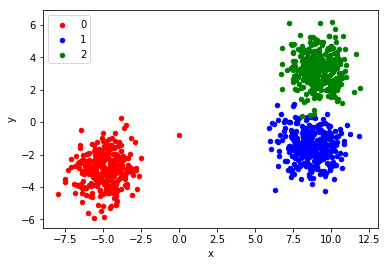

In [2]:
#Load in sample data --- from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

from sklearn.datasets.samples_generator import make_blobs
from pandas import DataFrame
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [3]:
#Back to the tutorial --- first get bearings
index = int(0.9*len(X))
x_train, y_train = X[:index],y[:index]
x_test, y_test = X[index:], y[index:]
input_dim = X.shape[1]
output_dim = 1

model = Sequential()
model.add(Dense(5, input_dim=input_dim,activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(output_dim,activation='linear'))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x_train, y_train, verbose=1)

Epoch 1/1
900/900 [==============================] - 0s 139us/step - loss: 0.4120


In [4]:
y_pred = model.predict_on_batch(x_test)
y_pred = np.round(y_pred)
y_pred.resize(len(y_pred))

sum(y_pred == y_test) / (1.0*len(y_test))

0.92

### Now use tensorboard

In [19]:
index = int(0.9*len(X))
x_train, y_train = X[:index],y[:index]
x_test, y_test = X[index:], y[index:]
input_dim = X.shape[1]
output_dim = 1

#Define model
model = Sequential()
model.add(Dense(100, input_dim=input_dim,activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(output_dim,activation='linear'))
model.compile(optimizer='sgd', loss='mean_squared_error')

#Add in tensor board
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False, write_grads=True)

model.fit(x_train,y_train,epochs=10000,verbose=1,callbacks=[tensorboard])

Epoch 1/10000
900/900 [==============================] - 0s 122us/step - loss: 0.1668
Epoch 2/10000
900/900 [==============================] - 0s 33us/step - loss: 0.0778
Epoch 3/10000
900/900 [==============================] - 0s 33us/step - loss: 0.0720
Epoch 4/10000
900/900 [==============================] - 0s 39us/step - loss: 0.0674
Epoch 5/10000
900/900 [==============================] - 0s 46us/step - loss: 0.0624
Epoch 6/10000
900/900 [==============================] - 0s 46us/step - loss: 0.0585
Epoch 7/10000
900/900 [==============================] - 0s 43us/step - loss: 0.0546
Epoch 8/10000
900/900 [==============================] - 0s 37us/step - loss: 0.0526
Epoch 9/10000
900/900 [==============================] - 0s 40us/step - loss: 0.0479
Epoch 10/10000
900/900 [==============================] - 0s 51us/step - loss: 0.0456
Epoch 11/10000
900/900 [==============================] - 0s 36us/step - loss: 0.0432
Epoch 12/10000
900/900 [==============================] - 0s 4

900/900 [==============================] - 0s 37us/step - loss: 0.0010
Epoch 190/10000
900/900 [==============================] - 0s 32us/step - loss: 0.0011
Epoch 191/10000
900/900 [==============================] - 0s 43us/step - loss: 0.0011
Epoch 192/10000
900/900 [==============================] - 0s 46us/step - loss: 0.0012
Epoch 193/10000
900/900 [==============================] - 0s 46us/step - loss: 0.0010
Epoch 194/10000
900/900 [==============================] - 0s 38us/step - loss: 0.0010
Epoch 195/10000
900/900 [==============================] - 0s 36us/step - loss: 0.0010
Epoch 196/10000
900/900 [==============================] - 0s 43us/step - loss: 0.0010
Epoch 197/10000
900/900 [==============================] - 0s 37us/step - loss: 9.9964e-04
Epoch 198/10000
900/900 [==============================] - 0s 38us/step - loss: 9.7680e-04
Epoch 199/10000
900/900 [==============================] - 0s 31us/step - loss: 0.0011
Epoch 200/10000
900/900 [==========================

900/900 [==============================] - 0s 29us/step - loss: 2.9808e-04
Epoch 369/10000
900/900 [==============================] - 0s 28us/step - loss: 3.1348e-04
Epoch 370/10000
900/900 [==============================] - 0s 32us/step - loss: 2.9213e-04
Epoch 371/10000
900/900 [==============================] - 0s 35us/step - loss: 2.8123e-04
Epoch 372/10000
900/900 [==============================] - 0s 42us/step - loss: 2.8920e-04
Epoch 373/10000
900/900 [==============================] - 0s 28us/step - loss: 2.8064e-04
Epoch 374/10000
900/900 [==============================] - 0s 36us/step - loss: 2.8599e-04
Epoch 375/10000
900/900 [==============================] - ETA: 0s - loss: 3.8165e-0 - 0s 37us/step - loss: 2.8690e-04
Epoch 376/10000
900/900 [==============================] - 0s 32us/step - loss: 2.7901e-04
Epoch 377/10000
900/900 [==============================] - 0s 37us/step - loss: 2.6734e-04
Epoch 378/10000
900/900 [==============================] - 0s 32us/step - loss

900/900 [==============================] - 0s 40us/step - loss: 9.7185e-05
Epoch 547/10000
900/900 [==============================] - 0s 37us/step - loss: 9.6872e-05
Epoch 548/10000
900/900 [==============================] - 0s 47us/step - loss: 9.6114e-05
Epoch 549/10000
900/900 [==============================] - 0s 42us/step - loss: 9.4846e-05
Epoch 550/10000
900/900 [==============================] - 0s 49us/step - loss: 9.0931e-05
Epoch 551/10000
900/900 [==============================] - 0s 42us/step - loss: 9.3516e-05
Epoch 552/10000
900/900 [==============================] - 0s 40us/step - loss: 9.4744e-05
Epoch 553/10000
900/900 [==============================] - 0s 39us/step - loss: 9.4936e-05
Epoch 554/10000
900/900 [==============================] - 0s 46us/step - loss: 9.1651e-05
Epoch 555/10000
900/900 [==============================] - 0s 40us/step - loss: 9.6509e-05
Epoch 556/10000
900/900 [==============================] - 0s 51us/step - loss: 8.8868e-05
Epoch 557/10000

900/900 [==============================] - 0s 40us/step - loss: 3.7457e-05
Epoch 726/10000
900/900 [==============================] - 0s 31us/step - loss: 3.7378e-05
Epoch 727/10000
900/900 [==============================] - 0s 128us/step - loss: 3.6820e-05
Epoch 728/10000
900/900 [==============================] - 0s 57us/step - loss: 3.6705e-05
Epoch 729/10000
900/900 [==============================] - 0s 57us/step - loss: 3.7353e-05
Epoch 730/10000
900/900 [==============================] - 0s 52us/step - loss: 3.6250e-05
Epoch 731/10000
900/900 [==============================] - 0s 52us/step - loss: 3.5601e-05
Epoch 732/10000
900/900 [==============================] - 0s 31us/step - loss: 3.5730e-05
Epoch 733/10000
900/900 [==============================] - 0s 32us/step - loss: 3.6001e-05
Epoch 734/10000
900/900 [==============================] - 0s 37us/step - loss: 3.5988e-05
Epoch 735/10000
900/900 [==============================] - 0s 33us/step - loss: 3.7855e-05
Epoch 736/1000

900/900 [==============================] - 0s 61us/step - loss: 1.7820e-05
Epoch 905/10000
900/900 [==============================] - 0s 57us/step - loss: 1.8137e-05
Epoch 906/10000
900/900 [==============================] - 0s 77us/step - loss: 1.7901e-05
Epoch 907/10000
900/900 [==============================] - 0s 76us/step - loss: 1.7975e-05
Epoch 908/10000
900/900 [==============================] - 0s 98us/step - loss: 1.7750e-05
Epoch 909/10000
900/900 [==============================] - 0s 50us/step - loss: 1.7063e-05
Epoch 910/10000
900/900 [==============================] - 0s 65us/step - loss: 1.7415e-05
Epoch 911/10000
900/900 [==============================] - 0s 57us/step - loss: 1.8197e-05
Epoch 912/10000
900/900 [==============================] - 0s 46us/step - loss: 1.7053e-05
Epoch 913/10000
900/900 [==============================] - 0s 42us/step - loss: 1.9355e-05
Epoch 914/10000
900/900 [==============================] - 0s 40us/step - loss: 1.8136e-05
Epoch 915/10000

900/900 [==============================] - 0s 29us/step - loss: 1.1371e-05
Epoch 1082/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0965e-05
Epoch 1083/10000
900/900 [==============================] - 0s 35us/step - loss: 1.1075e-05
Epoch 1084/10000
900/900 [==============================] - 0s 32us/step - loss: 1.1162e-05
Epoch 1085/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1060e-05
Epoch 1086/10000
900/900 [==============================] - 0s 25us/step - loss: 1.0979e-05
Epoch 1087/10000
900/900 [==============================] - 0s 37us/step - loss: 1.1318e-05
Epoch 1088/10000
900/900 [==============================] - 0s 38us/step - loss: 1.0984e-05
Epoch 1089/10000
900/900 [==============================] - 0s 81us/step - loss: 1.1187e-05
Epoch 1090/10000
900/900 [==============================] - 0s 42us/step - loss: 1.0969e-05
Epoch 1091/10000
900/900 [==============================] - 0s 36us/step - loss: 1.1047e-05
Epoch

900/900 [==============================] - 0s 37us/step - loss: 8.3963e-06
Epoch 1259/10000
900/900 [==============================] - 0s 31us/step - loss: 8.5947e-06
Epoch 1260/10000
900/900 [==============================] - 0s 42us/step - loss: 8.2765e-06
Epoch 1261/10000
900/900 [==============================] - 0s 36us/step - loss: 8.7200e-06
Epoch 1262/10000
900/900 [==============================] - 0s 35us/step - loss: 8.3132e-06
Epoch 1263/10000
900/900 [==============================] - 0s 34us/step - loss: 8.3469e-06
Epoch 1264/10000
900/900 [==============================] - 0s 35us/step - loss: 8.5681e-06
Epoch 1265/10000
900/900 [==============================] - 0s 31us/step - loss: 8.3764e-06
Epoch 1266/10000
900/900 [==============================] - 0s 34us/step - loss: 8.3663e-06
Epoch 1267/10000
900/900 [==============================] - 0s 35us/step - loss: 8.2618e-06
Epoch 1268/10000
900/900 [==============================] - 0s 35us/step - loss: 8.1218e-06
Epoch

900/900 [==============================] - 0s 56us/step - loss: 6.7632e-06
Epoch 1435/10000
900/900 [==============================] - 0s 49us/step - loss: 6.6788e-06
Epoch 1436/10000
900/900 [==============================] - 0s 142us/step - loss: 6.6195e-06
Epoch 1437/10000
900/900 [==============================] - 0s 139us/step - loss: 6.6202e-06
Epoch 1438/10000
900/900 [==============================] - 0s 65us/step - loss: 6.5237e-06
Epoch 1439/10000
900/900 [==============================] - 0s 47us/step - loss: 6.7173e-06
Epoch 1440/10000
900/900 [==============================] - 0s 58us/step - loss: 6.4314e-06
Epoch 1441/10000
900/900 [==============================] - 0s 53us/step - loss: 6.4592e-06
Epoch 1442/10000
900/900 [==============================] - 0s 80us/step - loss: 6.6507e-06
Epoch 1443/10000
900/900 [==============================] - 0s 90us/step - loss: 6.5847e-06
Epoch 1444/10000
900/900 [==============================] - 0s 53us/step - loss: 6.5148e-06
Epo

900/900 [==============================] - 0s 37us/step - loss: 6.1687e-06
Epoch 1524/10000
900/900 [==============================] - 0s 32us/step - loss: 5.9664e-06
Epoch 1525/10000
900/900 [==============================] - 0s 51us/step - loss: 5.9944e-06
Epoch 1526/10000
900/900 [==============================] - 0s 41us/step - loss: 6.1763e-06
Epoch 1527/10000
900/900 [==============================] - 0s 36us/step - loss: 6.0573e-06
Epoch 1528/10000
900/900 [==============================] - 0s 34us/step - loss: 6.3324e-06
Epoch 1529/10000
900/900 [==============================] - 0s 36us/step - loss: 6.0412e-06
Epoch 1530/10000
900/900 [==============================] - 0s 46us/step - loss: 5.9326e-06
Epoch 1531/10000
900/900 [==============================] - 0s 37us/step - loss: 6.1348e-06
Epoch 1532/10000
900/900 [==============================] - 0s 34us/step - loss: 6.1751e-06
Epoch 1533/10000
900/900 [==============================] - 0s 33us/step - loss: 5.9081e-06
Epoch

900/900 [==============================] - 0s 32us/step - loss: 5.3594e-06
Epoch 1701/10000
900/900 [==============================] - 0s 41us/step - loss: 5.4740e-06
Epoch 1702/10000
900/900 [==============================] - 0s 39us/step - loss: 5.3185e-06
Epoch 1703/10000
900/900 [==============================] - 0s 39us/step - loss: 5.2666e-06
Epoch 1704/10000
900/900 [==============================] - 0s 67us/step - loss: 5.4836e-06
Epoch 1705/10000
900/900 [==============================] - 0s 47us/step - loss: 5.2469e-06
Epoch 1706/10000
900/900 [==============================] - 0s 40us/step - loss: 5.3666e-06
Epoch 1707/10000
900/900 [==============================] - 0s 34us/step - loss: 5.3774e-06
Epoch 1708/10000
900/900 [==============================] - 0s 35us/step - loss: 5.2078e-06
Epoch 1709/10000
900/900 [==============================] - 0s 42us/step - loss: 5.4270e-06
Epoch 1710/10000
900/900 [==============================] - 0s 43us/step - loss: 5.3739e-06
Epoch

900/900 [==============================] - 0s 32us/step - loss: 4.8130e-06
Epoch 1879/10000
900/900 [==============================] - 0s 35us/step - loss: 4.7440e-06
Epoch 1880/10000
900/900 [==============================] - 0s 45us/step - loss: 4.7751e-06
Epoch 1881/10000
900/900 [==============================] - 0s 37us/step - loss: 4.8764e-06
Epoch 1882/10000
900/900 [==============================] - 0s 39us/step - loss: 5.5106e-06
Epoch 1883/10000
900/900 [==============================] - 0s 37us/step - loss: 4.7316e-06
Epoch 1884/10000
900/900 [==============================] - 0s 38us/step - loss: 4.6586e-06
Epoch 1885/10000
900/900 [==============================] - 0s 34us/step - loss: 4.8300e-06
Epoch 1886/10000
900/900 [==============================] - 0s 33us/step - loss: 4.7889e-06
Epoch 1887/10000
900/900 [==============================] - 0s 40us/step - loss: 4.9060e-06
Epoch 1888/10000
900/900 [==============================] - 0s 36us/step - loss: 4.9398e-06
Epoch

900/900 [==============================] - 0s 105us/step - loss: 4.0823e-06
Epoch 2055/10000
900/900 [==============================] - 0s 86us/step - loss: 4.0634e-06
Epoch 2056/10000
900/900 [==============================] - 0s 63us/step - loss: 3.9729e-06
Epoch 2057/10000
900/900 [==============================] - 0s 70us/step - loss: 3.9718e-06
Epoch 2058/10000
900/900 [==============================] - 0s 61us/step - loss: 4.3582e-06
Epoch 2059/10000
900/900 [==============================] - 0s 51us/step - loss: 4.0525e-06
Epoch 2060/10000
900/900 [==============================] - 0s 50us/step - loss: 3.9959e-06
Epoch 2061/10000
900/900 [==============================] - 0s 40us/step - loss: 4.2436e-06
Epoch 2062/10000
900/900 [==============================] - 0s 39us/step - loss: 3.9950e-06
Epoch 2063/10000
900/900 [==============================] - 0s 34us/step - loss: 4.1038e-06
Epoch 2064/10000
900/900 [==============================] - 0s 32us/step - loss: 4.0195e-06
Epoc

900/900 [==============================] - 0s 31us/step - loss: 3.4289e-06
Epoch 2232/10000
900/900 [==============================] - 0s 28us/step - loss: 3.4823e-06
Epoch 2233/10000
900/900 [==============================] - 0s 42us/step - loss: 3.5613e-06
Epoch 2234/10000
900/900 [==============================] - 0s 46us/step - loss: 3.4986e-06
Epoch 2235/10000
900/900 [==============================] - 0s 45us/step - loss: 3.5067e-06
Epoch 2236/10000
900/900 [==============================] - 0s 35us/step - loss: 3.7076e-06
Epoch 2237/10000
900/900 [==============================] - 0s 52us/step - loss: 3.5854e-06
Epoch 2238/10000
900/900 [==============================] - 0s 59us/step - loss: 3.4446e-06
Epoch 2239/10000
900/900 [==============================] - 0s 52us/step - loss: 3.5328e-06
Epoch 2240/10000
900/900 [==============================] - 0s 35us/step - loss: 3.4169e-06
Epoch 2241/10000
900/900 [==============================] - 0s 42us/step - loss: 3.5091e-06
Epoch

Epoch 2409/10000
900/900 [==============================] - 0s 70us/step - loss: 3.2321e-06
Epoch 2410/10000
900/900 [==============================] - 0s 50us/step - loss: 3.1556e-06
Epoch 2411/10000
900/900 [==============================] - 0s 63us/step - loss: 3.0855e-06
Epoch 2412/10000
900/900 [==============================] - 0s 54us/step - loss: 3.1292e-06
Epoch 2413/10000
900/900 [==============================] - 0s 68us/step - loss: 3.1357e-06
Epoch 2414/10000
900/900 [==============================] - 0s 82us/step - loss: 3.1862e-06
Epoch 2415/10000
900/900 [==============================] - 0s 77us/step - loss: 3.0814e-06
Epoch 2416/10000
900/900 [==============================] - 0s 60us/step - loss: 3.1314e-06
Epoch 2417/10000
900/900 [==============================] - 0s 45us/step - loss: 3.1099e-06
Epoch 2418/10000
900/900 [==============================] - 0s 38us/step - loss: 3.0808e-06
Epoch 2419/10000
900/900 [==============================] - 0s 49us/step - loss:

900/900 [==============================] - 0s 41us/step - loss: 3.0698e-06
Epoch 2499/10000
900/900 [==============================] - 0s 30us/step - loss: 2.9906e-06
Epoch 2500/10000
900/900 [==============================] - 0s 44us/step - loss: 3.0974e-06
Epoch 2501/10000
900/900 [==============================] - 0s 43us/step - loss: 3.0754e-06
Epoch 2502/10000
900/900 [==============================] - 0s 35us/step - loss: 3.1252e-06
Epoch 2503/10000
900/900 [==============================] - 0s 42us/step - loss: 3.0661e-06
Epoch 2504/10000
900/900 [==============================] - 0s 36us/step - loss: 3.0388e-06
Epoch 2505/10000
900/900 [==============================] - 0s 41us/step - loss: 3.0136e-06
Epoch 2506/10000
900/900 [==============================] - 0s 40us/step - loss: 3.0653e-06
Epoch 2507/10000
900/900 [==============================] - 0s 29us/step - loss: 3.0350e-06
Epoch 2508/10000
900/900 [==============================] - 0s 37us/step - loss: 3.0547e-06
Epoch

900/900 [==============================] - 0s 34us/step - loss: 2.9652e-06
Epoch 2676/10000
900/900 [==============================] - 0s 35us/step - loss: 2.7946e-06
Epoch 2677/10000
900/900 [==============================] - 0s 50us/step - loss: 2.8370e-06
Epoch 2678/10000
900/900 [==============================] - 0s 45us/step - loss: 3.0719e-06
Epoch 2679/10000
900/900 [==============================] - 0s 113us/step - loss: 2.8283e-06
Epoch 2680/10000
900/900 [==============================] - 0s 96us/step - loss: 2.8312e-06
Epoch 2681/10000
900/900 [==============================] - 0s 37us/step - loss: 2.8852e-06
Epoch 2682/10000
900/900 [==============================] - 0s 37us/step - loss: 2.9150e-06
Epoch 2683/10000
900/900 [==============================] - 0s 36us/step - loss: 2.8945e-06
Epoch 2684/10000
900/900 [==============================] - 0s 37us/step - loss: 2.9074e-06
Epoch 2685/10000
900/900 [==============================] - 0s 41us/step - loss: 2.8700e-06
Epoc

900/900 [==============================] - 0s 34us/step - loss: 2.7033e-06
Epoch 2765/10000
900/900 [==============================] - 0s 31us/step - loss: 2.7985e-06
Epoch 2766/10000
900/900 [==============================] - 0s 47us/step - loss: 2.8377e-06
Epoch 2767/10000
900/900 [==============================] - 0s 35us/step - loss: 2.7905e-06
Epoch 2768/10000
900/900 [==============================] - 0s 35us/step - loss: 2.8207e-06
Epoch 2769/10000
900/900 [==============================] - 0s 42us/step - loss: 2.7589e-06
Epoch 2770/10000
900/900 [==============================] - 0s 33us/step - loss: 2.7357e-06
Epoch 2771/10000
900/900 [==============================] - 0s 37us/step - loss: 2.7797e-06
Epoch 2772/10000
900/900 [==============================] - 0s 34us/step - loss: 2.7405e-06
Epoch 2773/10000
900/900 [==============================] - 0s 37us/step - loss: 2.7471e-06
Epoch 2774/10000
900/900 [==============================] - 0s 30us/step - loss: 2.7681e-06
Epoch

900/900 [==============================] - 0s 73us/step - loss: 3.0365e-06
Epoch 2941/10000
900/900 [==============================] - 0s 56us/step - loss: 2.6558e-06
Epoch 2942/10000
900/900 [==============================] - 0s 88us/step - loss: 2.7178e-06
Epoch 2943/10000
900/900 [==============================] - 0s 91us/step - loss: 2.6044e-06
Epoch 2944/10000
900/900 [==============================] - 0s 168us/step - loss: 2.5892e-06
Epoch 2945/10000
900/900 [==============================] - 0s 81us/step - loss: 2.9544e-06
Epoch 2946/10000
900/900 [==============================] - 0s 60us/step - loss: 2.6727e-06
Epoch 2947/10000
900/900 [==============================] - 0s 85us/step - loss: 2.6536e-06
Epoch 2948/10000
900/900 [==============================] - 0s 96us/step - loss: 2.8853e-06
Epoch 2949/10000
900/900 [==============================] - 0s 85us/step - loss: 2.6228e-06
Epoch 2950/10000
900/900 [==============================] - 0s 71us/step - loss: 2.5688e-06
Epoc

Epoch 3029/10000
900/900 [==============================] - 0s 45us/step - loss: 2.5258e-06
Epoch 3030/10000
900/900 [==============================] - 0s 36us/step - loss: 2.6522e-06
Epoch 3031/10000
900/900 [==============================] - 0s 39us/step - loss: 2.5641e-06
Epoch 3032/10000
900/900 [==============================] - 0s 32us/step - loss: 2.6868e-06
Epoch 3033/10000
900/900 [==============================] - 0s 38us/step - loss: 2.6096e-06
Epoch 3034/10000
900/900 [==============================] - 0s 47us/step - loss: 2.5631e-06
Epoch 3035/10000
900/900 [==============================] - 0s 38us/step - loss: 2.5631e-06
Epoch 3036/10000
900/900 [==============================] - 0s 30us/step - loss: 2.5541e-06
Epoch 3037/10000
900/900 [==============================] - 0s 40us/step - loss: 2.5921e-06
Epoch 3038/10000
900/900 [==============================] - 0s 36us/step - loss: 2.5969e-06
Epoch 3039/10000
900/900 [==============================] - 0s 31us/step - loss:

900/900 [==============================] - 0s 41us/step - loss: 2.4174e-06
Epoch 3206/10000
900/900 [==============================] - 0s 35us/step - loss: 2.6377e-06
Epoch 3207/10000
900/900 [==============================] - 0s 47us/step - loss: 2.4922e-06
Epoch 3208/10000
900/900 [==============================] - 0s 36us/step - loss: 2.5563e-06
Epoch 3209/10000
900/900 [==============================] - 0s 34us/step - loss: 2.4449e-06
Epoch 3210/10000
900/900 [==============================] - 0s 41us/step - loss: 2.4688e-06
Epoch 3211/10000
900/900 [==============================] - 0s 36us/step - loss: 2.4329e-06
Epoch 3212/10000
900/900 [==============================] - 0s 31us/step - loss: 2.5100e-06
Epoch 3213/10000
900/900 [==============================] - 0s 41us/step - loss: 2.4128e-06
Epoch 3214/10000
900/900 [==============================] - 0s 38us/step - loss: 2.9282e-06
Epoch 3215/10000
900/900 [==============================] - 0s 39us/step - loss: 2.4184e-06
Epoch

900/900 [==============================] - 0s 26us/step - loss: 2.3613e-06
Epoch 3383/10000
900/900 [==============================] - 0s 28us/step - loss: 2.3951e-06
Epoch 3384/10000
900/900 [==============================] - 0s 36us/step - loss: 2.3952e-06
Epoch 3385/10000
900/900 [==============================] - 0s 33us/step - loss: 2.3269e-06
Epoch 3386/10000
900/900 [==============================] - 0s 34us/step - loss: 2.3543e-06
Epoch 3387/10000
900/900 [==============================] - 0s 34us/step - loss: 2.3508e-06
Epoch 3388/10000
900/900 [==============================] - 0s 32us/step - loss: 2.3593e-06
Epoch 3389/10000
900/900 [==============================] - 0s 35us/step - loss: 2.5221e-06
Epoch 3390/10000
900/900 [==============================] - 0s 33us/step - loss: 2.4961e-06
Epoch 3391/10000
900/900 [==============================] - 0s 36us/step - loss: 2.4466e-06
Epoch 3392/10000
900/900 [==============================] - 0s 33us/step - loss: 2.3304e-06
Epoch

900/900 [==============================] - 0s 51us/step - loss: 2.2644e-06
Epoch 3561/10000
900/900 [==============================] - 0s 28us/step - loss: 2.2728e-06
Epoch 3562/10000
900/900 [==============================] - 0s 32us/step - loss: 2.2716e-06
Epoch 3563/10000
900/900 [==============================] - 0s 33us/step - loss: 2.3024e-06
Epoch 3564/10000
900/900 [==============================] - 0s 40us/step - loss: 2.2973e-06
Epoch 3565/10000
900/900 [==============================] - 0s 46us/step - loss: 2.2948e-06
Epoch 3566/10000
900/900 [==============================] - 0s 47us/step - loss: 2.2475e-06
Epoch 3567/10000
900/900 [==============================] - 0s 44us/step - loss: 2.2586e-06
Epoch 3568/10000
900/900 [==============================] - 0s 46us/step - loss: 2.2254e-06
Epoch 3569/10000
900/900 [==============================] - 0s 33us/step - loss: 2.2571e-06
Epoch 3570/10000
900/900 [==============================] - 0s 41us/step - loss: 2.3615e-06
Epoch

900/900 [==============================] - 0s 48us/step - loss: 2.1524e-06
Epoch 3738/10000
900/900 [==============================] - 0s 47us/step - loss: 2.1311e-06
Epoch 3739/10000
900/900 [==============================] - 0s 46us/step - loss: 2.1180e-06
Epoch 3740/10000
900/900 [==============================] - 0s 44us/step - loss: 2.1781e-06
Epoch 3741/10000
900/900 [==============================] - 0s 51us/step - loss: 2.1128e-06
Epoch 3742/10000
900/900 [==============================] - 0s 54us/step - loss: 2.1465e-06
Epoch 3743/10000
900/900 [==============================] - 0s 47us/step - loss: 2.1742e-06
Epoch 3744/10000
900/900 [==============================] - 0s 46us/step - loss: 2.1468e-06
Epoch 3745/10000
900/900 [==============================] - 0s 36us/step - loss: 2.1856e-06
Epoch 3746/10000
900/900 [==============================] - 0s 49us/step - loss: 2.4610e-06
Epoch 3747/10000
900/900 [==============================] - 0s 45us/step - loss: 2.8581e-06
Epoch

900/900 [==============================] - 0s 27us/step - loss: 2.1146e-06
Epoch 3915/10000
900/900 [==============================] - 0s 31us/step - loss: 2.1300e-06
Epoch 3916/10000
900/900 [==============================] - 0s 31us/step - loss: 2.3780e-06
Epoch 3917/10000
900/900 [==============================] - 0s 31us/step - loss: 2.0998e-06
Epoch 3918/10000
900/900 [==============================] - 0s 33us/step - loss: 2.0998e-06
Epoch 3919/10000
900/900 [==============================] - 0s 27us/step - loss: 2.1110e-06
Epoch 3920/10000
900/900 [==============================] - 0s 40us/step - loss: 2.0976e-06
Epoch 3921/10000
900/900 [==============================] - 0s 37us/step - loss: 2.1000e-06
Epoch 3922/10000
900/900 [==============================] - 0s 34us/step - loss: 2.1044e-06
Epoch 3923/10000
900/900 [==============================] - 0s 29us/step - loss: 2.0708e-06
Epoch 3924/10000
900/900 [==============================] - 0s 33us/step - loss: 2.1368e-06
Epoch

900/900 [==============================] - 0s 30us/step - loss: 1.9557e-06
Epoch 4092/10000
900/900 [==============================] - 0s 37us/step - loss: 2.0101e-06
Epoch 4093/10000
900/900 [==============================] - 0s 31us/step - loss: 2.0697e-06
Epoch 4094/10000
900/900 [==============================] - 0s 37us/step - loss: 2.0303e-06
Epoch 4095/10000
900/900 [==============================] - 0s 37us/step - loss: 2.1613e-06
Epoch 4096/10000
900/900 [==============================] - 0s 40us/step - loss: 1.9974e-06
Epoch 4097/10000
900/900 [==============================] - 0s 38us/step - loss: 2.0679e-06
Epoch 4098/10000
900/900 [==============================] - 0s 37us/step - loss: 1.9871e-06
Epoch 4099/10000
900/900 [==============================] - 0s 29us/step - loss: 2.0292e-06
Epoch 4100/10000
900/900 [==============================] - 0s 41us/step - loss: 2.0066e-06
Epoch 4101/10000
900/900 [==============================] - 0s 40us/step - loss: 2.0298e-06
Epoch

900/900 [==============================] - 0s 27us/step - loss: 1.9672e-06
Epoch 4270/10000
900/900 [==============================] - 0s 28us/step - loss: 1.9362e-06
Epoch 4271/10000
900/900 [==============================] - 0s 26us/step - loss: 1.9828e-06
Epoch 4272/10000
900/900 [==============================] - 0s 39us/step - loss: 1.9635e-06
Epoch 4273/10000
900/900 [==============================] - 0s 31us/step - loss: 1.9678e-06
Epoch 4274/10000
900/900 [==============================] - 0s 37us/step - loss: 2.0343e-06
Epoch 4275/10000
900/900 [==============================] - 0s 34us/step - loss: 1.9560e-06
Epoch 4276/10000
900/900 [==============================] - 0s 33us/step - loss: 1.9959e-06
Epoch 4277/10000
900/900 [==============================] - 0s 29us/step - loss: 2.0683e-06
Epoch 4278/10000
900/900 [==============================] - 0s 37us/step - loss: 1.9573e-06
Epoch 4279/10000
900/900 [==============================] - 0s 33us/step - loss: 1.9633e-06
Epoch

900/900 [==============================] - 0s 45us/step - loss: 1.8413e-06
Epoch 4448/10000
900/900 [==============================] - 0s 38us/step - loss: 1.9028e-06
Epoch 4449/10000
900/900 [==============================] - 0s 38us/step - loss: 1.8928e-06
Epoch 4450/10000
900/900 [==============================] - 0s 30us/step - loss: 1.9312e-06
Epoch 4451/10000
900/900 [==============================] - 0s 32us/step - loss: 1.8836e-06
Epoch 4452/10000
900/900 [==============================] - 0s 39us/step - loss: 1.9115e-06
Epoch 4453/10000
900/900 [==============================] - 0s 29us/step - loss: 1.9105e-06
Epoch 4454/10000
900/900 [==============================] - 0s 33us/step - loss: 1.8817e-06
Epoch 4455/10000
900/900 [==============================] - 0s 29us/step - loss: 1.8805e-06
Epoch 4456/10000
900/900 [==============================] - 0s 29us/step - loss: 1.8789e-06
Epoch 4457/10000
900/900 [==============================] - 0s 36us/step - loss: 1.8484e-06
Epoch

900/900 [==============================] - 0s 30us/step - loss: 1.8239e-06
Epoch 4625/10000
900/900 [==============================] - 0s 29us/step - loss: 1.8414e-06
Epoch 4626/10000
900/900 [==============================] - 0s 40us/step - loss: 1.8386e-06
Epoch 4627/10000
900/900 [==============================] - 0s 35us/step - loss: 1.8470e-06
Epoch 4628/10000
900/900 [==============================] - 0s 32us/step - loss: 1.7816e-06
Epoch 4629/10000
900/900 [==============================] - 0s 34us/step - loss: 1.8438e-06
Epoch 4630/10000
900/900 [==============================] - 0s 35us/step - loss: 1.8013e-06
Epoch 4631/10000
900/900 [==============================] - 0s 34us/step - loss: 1.8178e-06
Epoch 4632/10000
900/900 [==============================] - 0s 30us/step - loss: 1.8912e-06
Epoch 4633/10000
900/900 [==============================] - 0s 34us/step - loss: 1.8702e-06
Epoch 4634/10000
900/900 [==============================] - 0s 36us/step - loss: 1.8388e-06
Epoch

900/900 [==============================] - 0s 29us/step - loss: 1.8893e-06
Epoch 4801/10000
900/900 [==============================] - 0s 33us/step - loss: 1.8295e-06
Epoch 4802/10000
900/900 [==============================] - 0s 38us/step - loss: 1.7954e-06
Epoch 4803/10000
900/900 [==============================] - 0s 31us/step - loss: 1.7842e-06
Epoch 4804/10000
900/900 [==============================] - 0s 38us/step - loss: 1.7815e-06
Epoch 4805/10000
900/900 [==============================] - 0s 34us/step - loss: 1.7587e-06
Epoch 4806/10000
900/900 [==============================] - 0s 32us/step - loss: 1.7579e-06
Epoch 4807/10000
900/900 [==============================] - 0s 36us/step - loss: 1.7689e-06
Epoch 4808/10000
900/900 [==============================] - 0s 30us/step - loss: 1.7777e-06
Epoch 4809/10000
900/900 [==============================] - 0s 36us/step - loss: 1.7564e-06
Epoch 4810/10000
900/900 [==============================] - 0s 32us/step - loss: 1.9101e-06
Epoch

900/900 [==============================] - 0s 30us/step - loss: 1.7171e-06
Epoch 4979/10000
900/900 [==============================] - 0s 33us/step - loss: 1.7107e-06
Epoch 4980/10000
900/900 [==============================] - 0s 35us/step - loss: 1.7407e-06
Epoch 4981/10000
900/900 [==============================] - 0s 38us/step - loss: 1.7466e-06
Epoch 4982/10000
900/900 [==============================] - 0s 35us/step - loss: 1.7319e-06
Epoch 4983/10000
900/900 [==============================] - 0s 34us/step - loss: 1.7487e-06
Epoch 4984/10000
900/900 [==============================] - 0s 38us/step - loss: 1.7507e-06
Epoch 4985/10000
900/900 [==============================] - 0s 33us/step - loss: 1.8675e-06
Epoch 4986/10000
900/900 [==============================] - 0s 39us/step - loss: 1.7719e-06
Epoch 4987/10000
900/900 [==============================] - 0s 41us/step - loss: 1.7435e-06
Epoch 4988/10000
900/900 [==============================] - 0s 56us/step - loss: 1.7642e-06
Epoch

900/900 [==============================] - 0s 36us/step - loss: 1.6845e-06
Epoch 5156/10000
900/900 [==============================] - 0s 34us/step - loss: 1.7824e-06
Epoch 5157/10000
900/900 [==============================] - 0s 41us/step - loss: 1.6524e-06
Epoch 5158/10000
900/900 [==============================] - 0s 40us/step - loss: 1.6695e-06
Epoch 5159/10000
900/900 [==============================] - 0s 31us/step - loss: 1.6969e-06
Epoch 5160/10000
900/900 [==============================] - 0s 29us/step - loss: 1.7723e-06
Epoch 5161/10000
900/900 [==============================] - 0s 38us/step - loss: 1.6721e-06
Epoch 5162/10000
900/900 [==============================] - 0s 37us/step - loss: 1.6482e-06
Epoch 5163/10000
900/900 [==============================] - 0s 29us/step - loss: 1.6770e-06
Epoch 5164/10000
900/900 [==============================] - 0s 31us/step - loss: 1.6552e-06
Epoch 5165/10000
900/900 [==============================] - 0s 37us/step - loss: 1.6957e-06
Epoch

900/900 [==============================] - 0s 29us/step - loss: 1.6525e-06
Epoch 5334/10000
900/900 [==============================] - 0s 36us/step - loss: 1.6617e-06
Epoch 5335/10000
900/900 [==============================] - 0s 38us/step - loss: 1.7478e-06
Epoch 5336/10000
900/900 [==============================] - 0s 32us/step - loss: 1.7046e-06
Epoch 5337/10000
900/900 [==============================] - 0s 30us/step - loss: 1.6714e-06
Epoch 5338/10000
900/900 [==============================] - 0s 32us/step - loss: 1.6285e-06
Epoch 5339/10000
900/900 [==============================] - 0s 32us/step - loss: 1.6503e-06
Epoch 5340/10000
900/900 [==============================] - 0s 28us/step - loss: 1.6989e-06
Epoch 5341/10000
900/900 [==============================] - 0s 33us/step - loss: 1.6775e-06
Epoch 5342/10000
900/900 [==============================] - 0s 37us/step - loss: 1.7728e-06
Epoch 5343/10000
900/900 [==============================] - 0s 33us/step - loss: 1.6523e-06
Epoch

900/900 [==============================] - 0s 32us/step - loss: 1.6575e-06
Epoch 5510/10000
900/900 [==============================] - 0s 28us/step - loss: 1.5829e-06
Epoch 5511/10000
900/900 [==============================] - 0s 33us/step - loss: 1.5994e-06
Epoch 5512/10000
900/900 [==============================] - 0s 29us/step - loss: 1.5866e-06
Epoch 5513/10000
900/900 [==============================] - 0s 34us/step - loss: 1.6343e-06
Epoch 5514/10000
900/900 [==============================] - 0s 28us/step - loss: 1.6355e-06
Epoch 5515/10000
900/900 [==============================] - 0s 33us/step - loss: 1.6089e-06
Epoch 5516/10000
900/900 [==============================] - 0s 31us/step - loss: 1.6357e-06
Epoch 5517/10000
900/900 [==============================] - 0s 36us/step - loss: 1.6715e-06
Epoch 5518/10000
900/900 [==============================] - 0s 36us/step - loss: 1.6486e-06
Epoch 5519/10000
900/900 [==============================] - 0s 29us/step - loss: 1.6181e-06
Epoch

900/900 [==============================] - 0s 32us/step - loss: 1.5769e-06
Epoch 5688/10000
900/900 [==============================] - 0s 32us/step - loss: 1.5310e-06
Epoch 5689/10000
900/900 [==============================] - 0s 35us/step - loss: 1.5967e-06
Epoch 5690/10000
900/900 [==============================] - 0s 28us/step - loss: 1.5568e-06
Epoch 5691/10000
900/900 [==============================] - 0s 35us/step - loss: 1.5731e-06
Epoch 5692/10000
900/900 [==============================] - 0s 36us/step - loss: 1.5754e-06
Epoch 5693/10000
900/900 [==============================] - 0s 35us/step - loss: 1.5519e-06
Epoch 5694/10000
900/900 [==============================] - 0s 29us/step - loss: 1.6263e-06
Epoch 5695/10000
900/900 [==============================] - 0s 37us/step - loss: 1.5980e-06
Epoch 5696/10000
900/900 [==============================] - 0s 28us/step - loss: 1.5509e-06
Epoch 5697/10000
900/900 [==============================] - 0s 34us/step - loss: 1.6105e-06
Epoch

900/900 [==============================] - 0s 36us/step - loss: 1.5598e-06
Epoch 5865/10000
900/900 [==============================] - 0s 31us/step - loss: 1.5718e-06
Epoch 5866/10000
900/900 [==============================] - 0s 43us/step - loss: 1.5224e-06
Epoch 5867/10000
900/900 [==============================] - 0s 36us/step - loss: 1.6081e-06
Epoch 5868/10000
900/900 [==============================] - 0s 36us/step - loss: 1.5490e-06
Epoch 5869/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5587e-06
Epoch 5870/10000
900/900 [==============================] - 0s 33us/step - loss: 1.5677e-06
Epoch 5871/10000
900/900 [==============================] - 0s 39us/step - loss: 1.6036e-06
Epoch 5872/10000
900/900 [==============================] - 0s 39us/step - loss: 1.5066e-06
Epoch 5873/10000
900/900 [==============================] - 0s 29us/step - loss: 1.5229e-06
Epoch 5874/10000
900/900 [==============================] - 0s 40us/step - loss: 1.5487e-06
Epoch

900/900 [==============================] - 0s 32us/step - loss: 1.5182e-06
Epoch 6042/10000
900/900 [==============================] - 0s 30us/step - loss: 1.6052e-06
Epoch 6043/10000
900/900 [==============================] - 0s 38us/step - loss: 1.5819e-06
Epoch 6044/10000
900/900 [==============================] - 0s 35us/step - loss: 1.5801e-06
Epoch 6045/10000
900/900 [==============================] - 0s 32us/step - loss: 1.5215e-06
Epoch 6046/10000
900/900 [==============================] - 0s 37us/step - loss: 1.4997e-06
Epoch 6047/10000
900/900 [==============================] - 0s 35us/step - loss: 1.5531e-06
Epoch 6048/10000
900/900 [==============================] - 0s 33us/step - loss: 1.5246e-06
Epoch 6049/10000
900/900 [==============================] - 0s 32us/step - loss: 1.5283e-06
Epoch 6050/10000
900/900 [==============================] - 0s 38us/step - loss: 1.5239e-06
Epoch 6051/10000
900/900 [==============================] - 0s 35us/step - loss: 1.5402e-06
Epoch

900/900 [==============================] - 0s 32us/step - loss: 1.4529e-06
Epoch 6218/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5308e-06
Epoch 6219/10000
900/900 [==============================] - 0s 32us/step - loss: 1.4879e-06
Epoch 6220/10000
900/900 [==============================] - 0s 36us/step - loss: 1.4852e-06
Epoch 6221/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4704e-06
Epoch 6222/10000
900/900 [==============================] - 0s 36us/step - loss: 1.4955e-06
Epoch 6223/10000
900/900 [==============================] - 0s 37us/step - loss: 1.5033e-06
Epoch 6224/10000
900/900 [==============================] - 0s 29us/step - loss: 1.5166e-06
Epoch 6225/10000
900/900 [==============================] - 0s 32us/step - loss: 1.4438e-06
Epoch 6226/10000
900/900 [==============================] - 0s 46us/step - loss: 1.5048e-06
Epoch 6227/10000
900/900 [==============================] - 0s 26us/step - loss: 1.4831e-06
Epoch

Epoch 6306/10000
900/900 [==============================] - 0s 31us/step - loss: 1.4900e-06
Epoch 6307/10000
900/900 [==============================] - 0s 35us/step - loss: 1.4951e-06
Epoch 6308/10000
900/900 [==============================] - 0s 27us/step - loss: 1.4883e-06
Epoch 6309/10000
900/900 [==============================] - 0s 35us/step - loss: 1.4535e-06
Epoch 6310/10000
900/900 [==============================] - 0s 34us/step - loss: 1.4706e-06
Epoch 6311/10000
900/900 [==============================] - 0s 35us/step - loss: 1.4986e-06
Epoch 6312/10000
900/900 [==============================] - 0s 34us/step - loss: 1.4843e-06
Epoch 6313/10000
900/900 [==============================] - 0s 31us/step - loss: 1.4507e-06
Epoch 6314/10000
900/900 [==============================] - 0s 41us/step - loss: 1.4864e-06
Epoch 6315/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4509e-06
Epoch 6316/10000
900/900 [==============================] - 0s 44us/step - loss:

900/900 [==============================] - 0s 32us/step - loss: 1.4602e-06
Epoch 6396/10000
900/900 [==============================] - 0s 35us/step - loss: 1.4352e-06
Epoch 6397/10000
900/900 [==============================] - 0s 34us/step - loss: 1.4380e-06
Epoch 6398/10000
900/900 [==============================] - 0s 34us/step - loss: 1.4451e-06
Epoch 6399/10000
900/900 [==============================] - 0s 37us/step - loss: 1.4495e-06
Epoch 6400/10000
900/900 [==============================] - 0s 33us/step - loss: 1.4578e-06
Epoch 6401/10000
900/900 [==============================] - 0s 32us/step - loss: 1.4117e-06
Epoch 6402/10000
900/900 [==============================] - 0s 34us/step - loss: 1.4909e-06
Epoch 6403/10000
900/900 [==============================] - 0s 31us/step - loss: 1.4561e-06
Epoch 6404/10000
900/900 [==============================] - 0s 43us/step - loss: 1.4594e-06
Epoch 6405/10000
900/900 [==============================] - 0s 25us/step - loss: 1.4501e-06
Epoch

900/900 [==============================] - 0s 29us/step - loss: 1.5294e-06
Epoch 6573/10000
900/900 [==============================] - 0s 29us/step - loss: 1.4164e-06
Epoch 6574/10000
900/900 [==============================] - 0s 33us/step - loss: 1.4085e-06
Epoch 6575/10000
900/900 [==============================] - ETA: 0s - loss: 9.5117e-0 - 0s 29us/step - loss: 1.4356e-06
Epoch 6576/10000
900/900 [==============================] - 0s 41us/step - loss: 1.4314e-06
Epoch 6577/10000
900/900 [==============================] - 0s 26us/step - loss: 1.4388e-06
Epoch 6578/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4058e-06
Epoch 6579/10000
900/900 [==============================] - 0s 34us/step - loss: 1.4471e-06
Epoch 6580/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4504e-06
Epoch 6581/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4572e-06
Epoch 6582/10000
900/900 [==============================] - 0s 33us/s

900/900 [==============================] - 0s 35us/step - loss: 1.3930e-06
Epoch 6750/10000
900/900 [==============================] - 0s 31us/step - loss: 1.3922e-06
Epoch 6751/10000
900/900 [==============================] - 0s 37us/step - loss: 1.3900e-06
Epoch 6752/10000
900/900 [==============================] - 0s 32us/step - loss: 1.3805e-06
Epoch 6753/10000
900/900 [==============================] - 0s 31us/step - loss: 1.4320e-06
Epoch 6754/10000
900/900 [==============================] - 0s 42us/step - loss: 1.4061e-06
Epoch 6755/10000
900/900 [==============================] - 0s 26us/step - loss: 1.3929e-06
Epoch 6756/10000
900/900 [==============================] - 0s 42us/step - loss: 1.3697e-06
Epoch 6757/10000
900/900 [==============================] - 0s 36us/step - loss: 1.3981e-06
Epoch 6758/10000
900/900 [==============================] - 0s 37us/step - loss: 1.3654e-06
Epoch 6759/10000
900/900 [==============================] - 0s 35us/step - loss: 1.3923e-06
Epoch

900/900 [==============================] - 0s 48us/step - loss: 1.3961e-06
Epoch 6928/10000
900/900 [==============================] - 0s 129us/step - loss: 1.3387e-06
Epoch 6929/10000
900/900 [==============================] - 0s 86us/step - loss: 1.3908e-06
Epoch 6930/10000
900/900 [==============================] - 0s 58us/step - loss: 1.3542e-06
Epoch 6931/10000
900/900 [==============================] - 0s 27us/step - loss: 1.3473e-06
Epoch 6932/10000
900/900 [==============================] - 0s 45us/step - loss: 1.3990e-06
Epoch 6933/10000
900/900 [==============================] - 0s 39us/step - loss: 1.3419e-06
Epoch 6934/10000
900/900 [==============================] - 0s 49us/step - loss: 1.3426e-06
Epoch 6935/10000
900/900 [==============================] - 0s 43us/step - loss: 1.3235e-06
Epoch 6936/10000
900/900 [==============================] - 0s 47us/step - loss: 1.4089e-06
Epoch 6937/10000
900/900 [==============================] - 0s 38us/step - loss: 1.3888e-06
Epoc

900/900 [==============================] - 0s 25us/step - loss: 1.3354e-06
Epoch 7105/10000
900/900 [==============================] - 0s 27us/step - loss: 1.3533e-06
Epoch 7106/10000
900/900 [==============================] - 0s 41us/step - loss: 1.3377e-06
Epoch 7107/10000
900/900 [==============================] - 0s 34us/step - loss: 1.3456e-06
Epoch 7108/10000
900/900 [==============================] - 0s 33us/step - loss: 1.3325e-06
Epoch 7109/10000
900/900 [==============================] - 0s 43us/step - loss: 1.3687e-06
Epoch 7110/10000
900/900 [==============================] - 0s 39us/step - loss: 1.3386e-06
Epoch 7111/10000
900/900 [==============================] - 0s 37us/step - loss: 1.7484e-06
Epoch 7112/10000
900/900 [==============================] - 0s 40us/step - loss: 1.3366e-06
Epoch 7113/10000
900/900 [==============================] - 0s 41us/step - loss: 1.3480e-06
Epoch 7114/10000
900/900 [==============================] - 0s 39us/step - loss: 1.3183e-06
Epoch

Epoch 7193/10000
900/900 [==============================] - 0s 31us/step - loss: 1.3760e-06
Epoch 7194/10000
900/900 [==============================] - 0s 34us/step - loss: 1.3075e-06
Epoch 7195/10000
900/900 [==============================] - 0s 25us/step - loss: 1.3244e-06
Epoch 7196/10000
900/900 [==============================] - 0s 28us/step - loss: 1.3726e-06
Epoch 7197/10000
900/900 [==============================] - ETA: 0s - loss: 3.0407e-0 - 0s 39us/step - loss: 1.3128e-06
Epoch 7198/10000
900/900 [==============================] - 0s 76us/step - loss: 1.3116e-06
Epoch 7199/10000
900/900 [==============================] - 0s 73us/step - loss: 1.3141e-06
Epoch 7200/10000
900/900 [==============================] - 0s 56us/step - loss: 1.3169e-06
Epoch 7201/10000
900/900 [==============================] - 0s 23us/step - loss: 1.3054e-06
Epoch 7202/10000
900/900 [==============================] - 0s 24us/step - loss: 1.3489e-06
Epoch 7203/10000
900/900 [==========================

900/900 [==============================] - 0s 29us/step - loss: 1.3144e-06
Epoch 7371/10000
900/900 [==============================] - 0s 22us/step - loss: 1.2657e-06
Epoch 7372/10000
900/900 [==============================] - 0s 24us/step - loss: 1.2957e-06
Epoch 7373/10000
900/900 [==============================] - 0s 27us/step - loss: 1.2922e-06
Epoch 7374/10000
900/900 [==============================] - 0s 32us/step - loss: 1.3129e-06
Epoch 7375/10000
900/900 [==============================] - 0s 32us/step - loss: 1.2910e-06
Epoch 7376/10000
900/900 [==============================] - 0s 29us/step - loss: 1.3356e-06
Epoch 7377/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2809e-06
Epoch 7378/10000
900/900 [==============================] - 0s 31us/step - loss: 1.3656e-06
Epoch 7379/10000
900/900 [==============================] - 0s 33us/step - loss: 1.3019e-06
Epoch 7380/10000
900/900 [==============================] - 0s 29us/step - loss: 1.3238e-06
Epoch

900/900 [==============================] - 0s 25us/step - loss: 1.4648e-06
Epoch 7549/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2933e-06
Epoch 7550/10000
900/900 [==============================] - 0s 25us/step - loss: 1.2925e-06
Epoch 7551/10000
900/900 [==============================] - 0s 31us/step - loss: 1.2368e-06
Epoch 7552/10000
900/900 [==============================] - 0s 30us/step - loss: 1.2858e-06
Epoch 7553/10000
900/900 [==============================] - 0s 30us/step - loss: 1.2797e-06
Epoch 7554/10000
900/900 [==============================] - 0s 26us/step - loss: 1.2514e-06
Epoch 7555/10000
900/900 [==============================] - 0s 27us/step - loss: 1.2442e-06
Epoch 7556/10000
900/900 [==============================] - 0s 30us/step - loss: 1.2611e-06
Epoch 7557/10000
900/900 [==============================] - 0s 30us/step - loss: 1.3132e-06
Epoch 7558/10000
900/900 [==============================] - 0s 27us/step - loss: 1.2753e-06
Epoch

900/900 [==============================] - 0s 29us/step - loss: 1.2869e-06
Epoch 7726/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5413e-06
Epoch 7727/10000
900/900 [==============================] - 0s 31us/step - loss: 1.2138e-06
Epoch 7728/10000
900/900 [==============================] - 0s 31us/step - loss: 1.2507e-06
Epoch 7729/10000
900/900 [==============================] - 0s 26us/step - loss: 1.3164e-06
Epoch 7730/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2668e-06
Epoch 7731/10000
900/900 [==============================] - 0s 25us/step - loss: 1.2156e-06
Epoch 7732/10000
900/900 [==============================] - 0s 30us/step - loss: 1.2382e-06
Epoch 7733/10000
900/900 [==============================] - 0s 31us/step - loss: 1.2314e-06
Epoch 7734/10000
900/900 [==============================] - 0s 27us/step - loss: 1.2644e-06
Epoch 7735/10000
900/900 [==============================] - 0s 31us/step - loss: 1.2438e-06
Epoch

900/900 [==============================] - 0s 29us/step - loss: 1.2274e-06
Epoch 7903/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2469e-06
Epoch 7904/10000
900/900 [==============================] - 0s 31us/step - loss: 1.1953e-06
Epoch 7905/10000
900/900 [==============================] - 0s 31us/step - loss: 1.2303e-06
Epoch 7906/10000
900/900 [==============================] - 0s 26us/step - loss: 1.2275e-06
Epoch 7907/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1838e-06
Epoch 7908/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2184e-06
Epoch 7909/10000
900/900 [==============================] - 0s 33us/step - loss: 1.2968e-06
Epoch 7910/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2264e-06
Epoch 7911/10000
900/900 [==============================] - 0s 30us/step - loss: 1.2333e-06
Epoch 7912/10000
900/900 [==============================] - 0s 33us/step - loss: 1.2096e-06
Epoch

900/900 [==============================] - 0s 36us/step - loss: 1.1907e-06
Epoch 8080/10000
900/900 [==============================] - 0s 33us/step - loss: 1.2079e-06
Epoch 8081/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1785e-06
Epoch 8082/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2059e-06
Epoch 8083/10000
900/900 [==============================] - 0s 25us/step - loss: 1.1689e-06
Epoch 8084/10000
900/900 [==============================] - 0s 26us/step - loss: 1.2368e-06
Epoch 8085/10000
900/900 [==============================] - 0s 27us/step - loss: 1.1872e-06
Epoch 8086/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2654e-06
Epoch 8087/10000
900/900 [==============================] - 0s 36us/step - loss: 1.2207e-06
Epoch 8088/10000
900/900 [==============================] - 0s 25us/step - loss: 1.1504e-06
Epoch 8089/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2885e-06
Epoch

900/900 [==============================] - 0s 27us/step - loss: 1.1360e-06
Epoch 8257/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1664e-06
Epoch 8258/10000
900/900 [==============================] - 0s 31us/step - loss: 1.1973e-06
Epoch 8259/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1464e-06
Epoch 8260/10000
900/900 [==============================] - 0s 34us/step - loss: 1.1693e-06
Epoch 8261/10000
900/900 [==============================] - 0s 31us/step - loss: 1.1432e-06
Epoch 8262/10000
900/900 [==============================] - 0s 30us/step - loss: 1.2290e-06
Epoch 8263/10000
900/900 [==============================] - 0s 24us/step - loss: 1.1959e-06
Epoch 8264/10000
900/900 [==============================] - 0s 30us/step - loss: 1.2037e-06
Epoch 8265/10000
900/900 [==============================] - 0s 27us/step - loss: 1.1542e-06
Epoch 8266/10000
900/900 [==============================] - 0s 22us/step - loss: 1.1742e-06
Epoch

900/900 [==============================] - 0s 27us/step - loss: 1.1350e-06
Epoch 8435/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1670e-06
Epoch 8436/10000
900/900 [==============================] - 0s 26us/step - loss: 1.1512e-06
Epoch 8437/10000
900/900 [==============================] - 0s 32us/step - loss: 1.1207e-06
Epoch 8438/10000
900/900 [==============================] - 0s 31us/step - loss: 1.1663e-06
Epoch 8439/10000
900/900 [==============================] - 0s 33us/step - loss: 1.1700e-06
Epoch 8440/10000
900/900 [==============================] - 0s 26us/step - loss: 1.1422e-06
Epoch 8441/10000
900/900 [==============================] - 0s 26us/step - loss: 1.1510e-06
Epoch 8442/10000
900/900 [==============================] - 0s 26us/step - loss: 1.1934e-06
Epoch 8443/10000
900/900 [==============================] - 0s 26us/step - loss: 1.1268e-06
Epoch 8444/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1528e-06
Epoch

900/900 [==============================] - 0s 27us/step - loss: 1.2163e-06
Epoch 8613/10000
900/900 [==============================] - 0s 35us/step - loss: 1.1214e-06
Epoch 8614/10000
900/900 [==============================] - 0s 32us/step - loss: 1.1262e-06
Epoch 8615/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1147e-06
Epoch 8616/10000
900/900 [==============================] - 0s 29us/step - loss: 1.1398e-06
Epoch 8617/10000
900/900 [==============================] - 0s 33us/step - loss: 1.1111e-06
Epoch 8618/10000
900/900 [==============================] - 0s 23us/step - loss: 1.1911e-06
Epoch 8619/10000
900/900 [==============================] - 0s 23us/step - loss: 1.1576e-06
Epoch 8620/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1182e-06
Epoch 8621/10000
900/900 [==============================] - 0s 31us/step - loss: 1.1370e-06
Epoch 8622/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1200e-06
Epoch

900/900 [==============================] - 0s 27us/step - loss: 1.0986e-06
Epoch 8791/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1041e-06
Epoch 8792/10000
900/900 [==============================] - 0s 27us/step - loss: 1.1450e-06
Epoch 8793/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0920e-06
Epoch 8794/10000
900/900 [==============================] - 0s 32us/step - loss: 1.1122e-06
Epoch 8795/10000
900/900 [==============================] - 0s 26us/step - loss: 1.1042e-06
Epoch 8796/10000
900/900 [==============================] - 0s 35us/step - loss: 1.1007e-06
Epoch 8797/10000
900/900 [==============================] - 0s 34us/step - loss: 1.1116e-06
Epoch 8798/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1031e-06
Epoch 8799/10000
900/900 [==============================] - 0s 32us/step - loss: 1.0971e-06
Epoch 8800/10000
900/900 [==============================] - 0s 29us/step - loss: 1.1823e-06
Epoch

900/900 [==============================] - 0s 29us/step - loss: 1.1799e-06
Epoch 8969/10000
900/900 [==============================] - 0s 26us/step - loss: 1.1495e-06
Epoch 8970/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0519e-06
Epoch 8971/10000
900/900 [==============================] - 0s 25us/step - loss: 1.0840e-06
Epoch 8972/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1174e-06
Epoch 8973/10000
900/900 [==============================] - 0s 35us/step - loss: 1.0988e-06
Epoch 8974/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0871e-06
Epoch 8975/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0953e-06
Epoch 8976/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0877e-06
Epoch 8977/10000
900/900 [==============================] - 0s 31us/step - loss: 1.0804e-06
Epoch 8978/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0944e-06
Epoch

900/900 [==============================] - 0s 26us/step - loss: 1.0659e-06
Epoch 9147/10000
900/900 [==============================] - 0s 32us/step - loss: 1.0927e-06
Epoch 9148/10000
900/900 [==============================] - 0s 29us/step - loss: 1.1785e-06
Epoch 9149/10000
900/900 [==============================] - 0s 32us/step - loss: 1.0612e-06
Epoch 9150/10000
900/900 [==============================] - 0s 26us/step - loss: 1.0850e-06
Epoch 9151/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0792e-06
Epoch 9152/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0791e-06
Epoch 9153/10000
900/900 [==============================] - 0s 34us/step - loss: 1.0788e-06
Epoch 9154/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0525e-06
Epoch 9155/10000
900/900 [==============================] - 0s 31us/step - loss: 1.0684e-06
Epoch 9156/10000
900/900 [==============================] - 0s 26us/step - loss: 1.0669e-06
Epoch

900/900 [==============================] - 0s 28us/step - loss: 1.0522e-06
Epoch 9325/10000
900/900 [==============================] - 0s 31us/step - loss: 1.0734e-06
Epoch 9326/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1492e-06
Epoch 9327/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0671e-06
Epoch 9328/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0497e-06
Epoch 9329/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0465e-06
Epoch 9330/10000
900/900 [==============================] - 0s 31us/step - loss: 1.0400e-06
Epoch 9331/10000
900/900 [==============================] - 0s 24us/step - loss: 1.0893e-06
Epoch 9332/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0638e-06
Epoch 9333/10000
900/900 [==============================] - 0s 26us/step - loss: 1.0546e-06
Epoch 9334/10000
900/900 [==============================] - 0s 25us/step - loss: 1.0733e-06
Epoch

Epoch 9502/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1516e-06
Epoch 9503/10000
900/900 [==============================] - 0s 22us/step - loss: 1.0629e-06
Epoch 9504/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0261e-06
Epoch 9505/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0795e-06
Epoch 9506/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0635e-06
Epoch 9507/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0511e-06
Epoch 9508/10000
900/900 [==============================] - 0s 26us/step - loss: 1.0657e-06
Epoch 9509/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0866e-06
Epoch 9510/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0697e-06
Epoch 9511/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0167e-06
Epoch 9512/10000
900/900 [==============================] - 0s 31us/step - loss:

900/900 [==============================] - 0s 34us/step - loss: 1.0460e-06
Epoch 9592/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0326e-06
Epoch 9593/10000
900/900 [==============================] - 0s 34us/step - loss: 1.0300e-06
Epoch 9594/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0529e-06
Epoch 9595/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0714e-06
Epoch 9596/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0307e-06
Epoch 9597/10000
900/900 [==============================] - ETA: 0s - loss: 3.5225e-0 - 0s 29us/step - loss: 1.1663e-06
Epoch 9598/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0397e-06
Epoch 9599/10000
900/900 [==============================] - 0s 31us/step - loss: 1.0539e-06
Epoch 9600/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0339e-06
Epoch 9601/10000
900/900 [==============================] - 0s 29us/s

900/900 [==============================] - 0s 32us/step - loss: 1.0235e-06
Epoch 9768/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0160e-06
Epoch 9769/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0245e-06
Epoch 9770/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0547e-06
Epoch 9771/10000
900/900 [==============================] - 0s 24us/step - loss: 1.0278e-06
Epoch 9772/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0122e-06
Epoch 9773/10000
900/900 [==============================] - 0s 26us/step - loss: 1.0188e-06
Epoch 9774/10000
900/900 [==============================] - 0s 32us/step - loss: 9.9596e-07
Epoch 9775/10000
900/900 [==============================] - 0s 32us/step - loss: 1.1379e-06
Epoch 9776/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1680e-06
Epoch 9777/10000
900/900 [==============================] - 0s 25us/step - loss: 1.0834e-06
Epoch

900/900 [==============================] - 0s 31us/step - loss: 1.0087e-06
Epoch 9946/10000
900/900 [==============================] - 0s 27us/step - loss: 1.1505e-06
Epoch 9947/10000
900/900 [==============================] - 0s 24us/step - loss: 9.7778e-07
Epoch 9948/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0016e-06
Epoch 9949/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0342e-06
Epoch 9950/10000
900/900 [==============================] - 0s 25us/step - loss: 1.0236e-06
Epoch 9951/10000
900/900 [==============================] - 0s 22us/step - loss: 1.0214e-06
Epoch 9952/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0007e-06
Epoch 9953/10000
900/900 [==============================] - 0s 27us/step - loss: 1.0333e-06
Epoch 9954/10000
900/900 [==============================] - 0s 26us/step - loss: 1.0136e-06
Epoch 9955/10000
900/900 [==============================] - 0s 28us/step - loss: 1.0863e-06
Epoch

### Aside 

In [7]:
#Back to the tutorial --- first get bearings
index = int(0.9*len(X))
x_train, y_train = X[:index],y[:index]
x_test, y_test = X[index:], y[index:]
input_dim = X.shape[1]
output_dim = 1

model = Sequential()
model.add(Dense(5, input_dim=input_dim,activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(output_dim,activation='linear'))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x_train, y_train, verbose=1)

Epoch 1/1
900/900 [==============================] - 0s 167us/step - loss: 0.2033


In [14]:
from keras.models import Input, Model

inp = Input(shape = (2,))
x = Dense(10, activation='relu')(inp)
x = Dense(10, activation='relu')(x)
out = Dense(activation='softmax')(x)

model = Model(inp,out)

AttributeError: 'InputLayer' object has no attribute 'outbound_nodes'